In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/netflix-shows'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/netflix-shows/netflix_titles.csv


In [20]:
file_path = "/kaggle/input/netflix-shows/netflix_titles.csv"  # Adjust the filename if needed
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [21]:
#Data Cleaning
#checking for any missing values
print(df.isnull().sum())


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [22]:
#Filling up the missing values appropriately
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

#Replacing missing rating with the most frequent rating
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

#Convert date_added to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], format = 'mixed')

#Filling missing dates with most frequent date
most_frequent_date = df['date_added'].mode()[0]
df['date_added'] = df['date_added'].fillna(most_frequent_date)

#Filling missing duration values
df.loc[(df['duration'].isnull()) & (df['type'] == 'Movie'), 'duration'] = 'Unknown'
df.loc[(df['duration'].isnull()) & (df['type'] == 'TV Show'), 'duration'] = '1 Season'

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


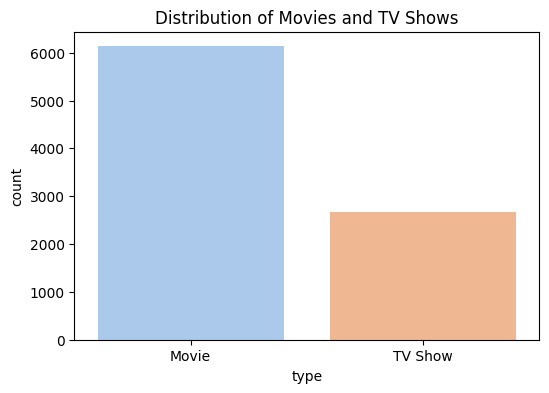

In [23]:
#EDA

#Content Distribution type (Movies vs Tv shows)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='pastel')
plt.title('Distribution of Movies and TV Shows')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


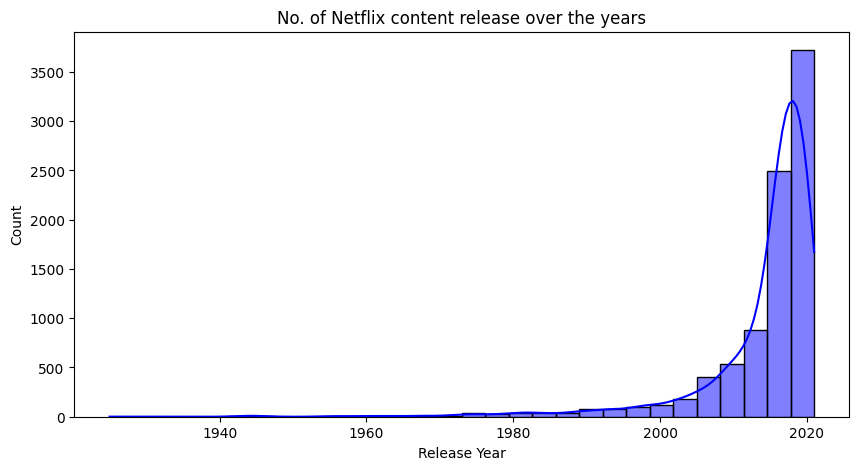

In [24]:
#Content Release Trend Over the Years
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'], bins=30, kde=True, color='blue')
plt.title('No. of Netflix content release over the years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

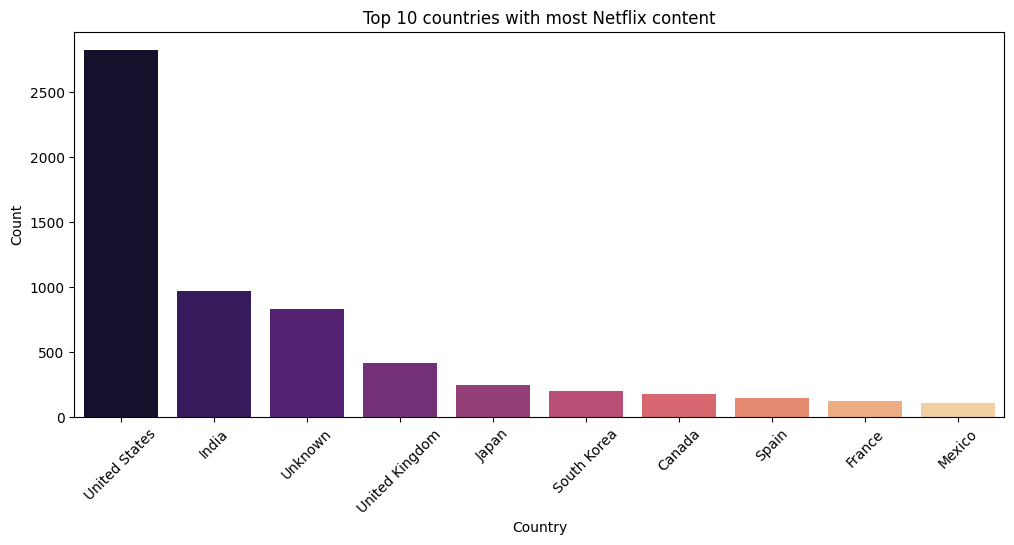

In [26]:
#Top Countries contributing most content
plt.figure(figsize=(12,5))
top_countries = df['country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='magma')
plt.title('Top 10 countries with most Netflix content')
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel('Count')
plt.show()

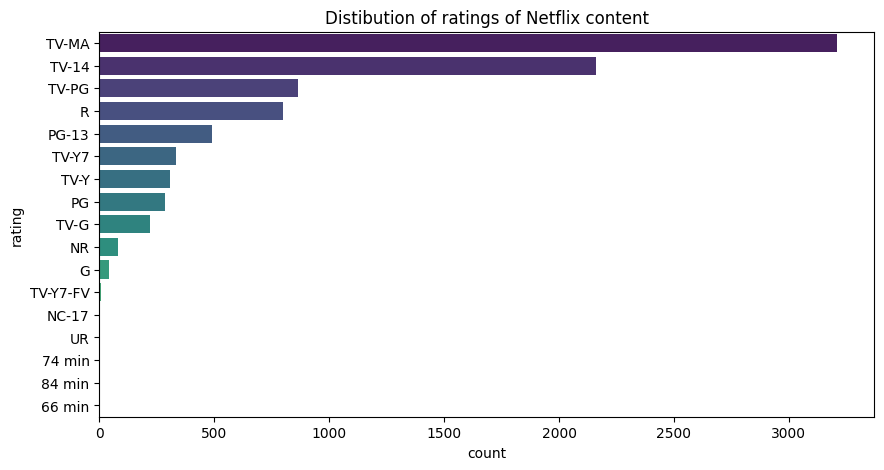

In [31]:
#Analyzing the Rating distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='viridis')
plt.title("Distibution of ratings of Netflix content")
plt.show()

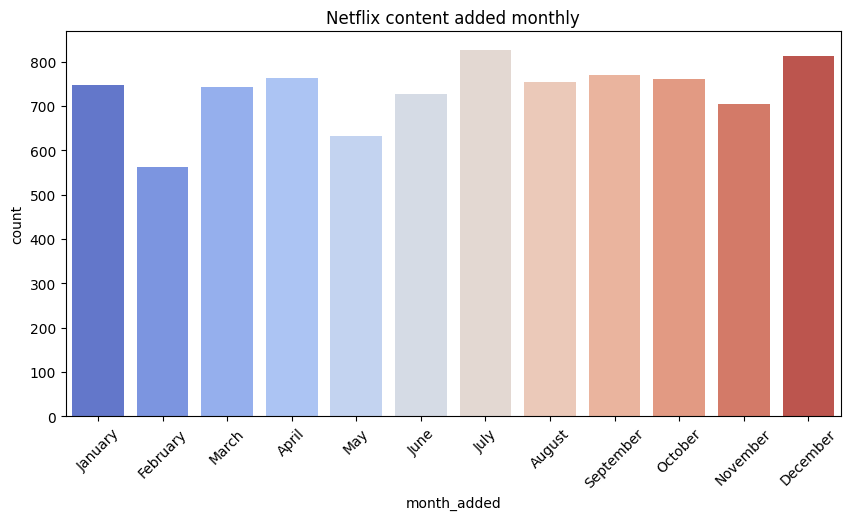

In [33]:
#Monthly content additions
df['month_added'] = df['date_added'].dt.month_name()

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='month_added', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Netflix content added monthly')
plt.show()

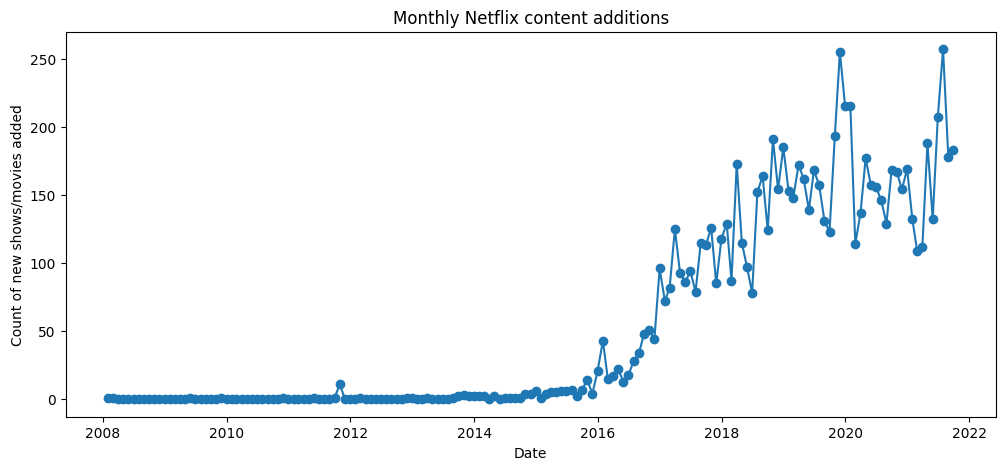

07:33:10 - cmdstanpy - INFO - Chain [1] start processing
07:33:10 - cmdstanpy - INFO - Chain [1] done processing


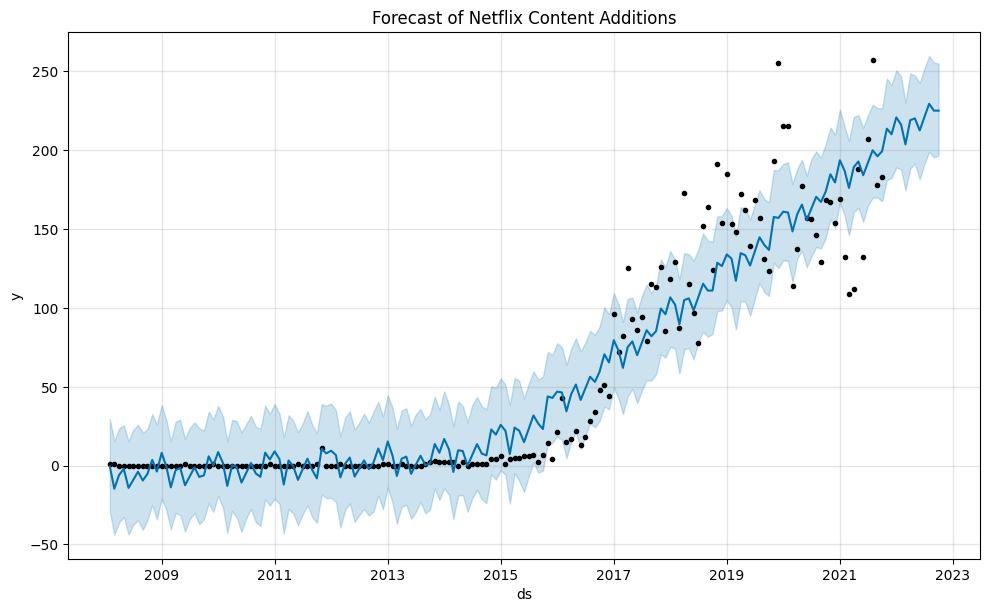

In [41]:
#Time series forecasting
from prophet import Prophet

#Group by month and counting the number of additions
df_monthly = df.resample('ME', on='date_added').count()['show_id'].reset_index()
df_monthly.columns = ['ds', 'y']

#plot the data
plt.figure(figsize=(12,5))
plt.plot(df_monthly['ds'], df_monthly['y'], marker='o', linestyle='-')
plt.title("Monthly Netflix content additions")
plt.xlabel("Date")
plt.ylabel("Count of new shows/movies added")
plt.show()

#Initialize and fit the Prophet model
model = Prophet()
model.fit(df_monthly)

#Making future predictions (upto 12 months)
future = model.make_future_dataframe(periods=12, freq='ME')
forecast = model.predict(future)

#plot the forecast
model.plot(forecast)
plt.title("Forecast of Netflix Content Additions")
plt.show()